# 서울시에서 공개한 코로나19 발생동향 분석
- http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
import pandas as pd


In [2]:
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
# 판다스의 read_html 을 통해 위 url에 있는 불러옵니다
table = pd.read_html(url)
len(table)

6

In [4]:
## transpose() 행과 열을 바꺼줄 수 있음
table[0].transpose()

,0
소계,1393
해외접촉관련,316
강남역삼동금융회사관련,8
관악구왕성교회관련,30
강남구사무실관련,6
강남구역삼동모임,12
도봉구요양시설관련,43
리치웨이관련,122
부천시쿠팡관련,24
수도권개척교회관련,37


In [5]:
table[4]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1393,13283,7.08.,광진구,-,광진구 확진자 접촉,서울의료원
1,1392,13271,7.08.,동작구,-,강남역삼동 금융회사,서남병원
2,1391,13250,7.08.,구로구,-,왕성교회 관련,생활치료센터
3,1390,13261,7.08.,노원구,우즈베키스탄,해외 접촉 추정,서울의료원
4,1389,13259,7.08.,중구,우즈베키스탄,해외 접촉 추정,순천향대병원
...,...,...,...,...,...,...,...
1388,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1389,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1390,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1391,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [6]:
table[5]

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,"1393 <tr> <td class=""tdl"" colspan=""5""> <p><...",#13283,광진구 확진자 접촉,7/08,광진구,서울의료원
1,"1392 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#13271,강남역삼동 금융회사,7/08,동작구,서남병원
2,"1391 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#13250,왕성교회 관련,7/08,구로구,생활치료센터
3,"1390 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#13261,해외 접촉 추정(우즈베키스탄),7/08,노원구,서울의료원
4,"1389 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#13259,해외 접촉 추정(우즈베키스탄),7/08,중구,순천향대병원
...,...,...,...,...,...,...
1388,"5 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",#9,#5 접촉,1/31,성북구,서울의료원(퇴원)
1389,"4 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",#7,해외 접촉(중국 우한시),1/30,마포구,서울의료원(퇴원)
1390,"3 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",#6,#3 접촉,1/30,종로구,서울대학교병원(퇴원)
1391,"2 <tr> <td class=""tdl"" colspan=""5""> <p>이동경로...",#5,해외 접촉(중국 우한시),1/30,중랑구,서울의료원(퇴원)


In [7]:
df = table[4]
df.shape

(1393, 7)

In [8]:
# 확진자 미리보기 
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1393,13283,7.08.,광진구,-,광진구 확진자 접촉,서울의료원
1,1392,13271,7.08.,동작구,-,강남역삼동 금융회사,서남병원
2,1391,13250,7.08.,구로구,-,왕성교회 관련,생활치료센터
3,1390,13261,7.08.,노원구,우즈베키스탄,해외 접촉 추정,서울의료원
4,1389,13259,7.08.,중구,우즈베키스탄,해외 접촉 추정,순천향대병원


In [9]:
last_day=df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'7_08_'

In [10]:
file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_7_08_.csv'

In [11]:
df.to_csv(file_name,index=False)

## 엑셀에서 저장 하기 위해서는 cp949 

In [12]:
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1393,13283,7.08.,광진구,-,광진구 확진자 접촉,서울의료원
1,1392,13271,7.08.,동작구,-,강남역삼동 금융회사,서남병원
2,1391,13250,7.08.,구로구,-,왕성교회 관련,생활치료센터
3,1390,13261,7.08.,노원구,우즈베키스탄,해외 접촉 추정,서울의료원
4,1389,13259,7.08.,중구,우즈베키스탄,해외 접촉 추정,순천향대병원
...,...,...,...,...,...,...,...
1388,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1389,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1390,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1391,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


# 시각화 도구 불러오기

In [120]:
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
%matplotlib inline
plt.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")
import matplotlib.font_manager as fm
import matplotlib as mpl
print ('설정 파일 위치: ', mpl.matplotlib_fname())
mpl.rcParams['axes.unicode_minus'] =False
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]
plt.rcParams["font.family"] = 'Malgun Gothic'

설정 파일 위치:  C:\Users\dkgue\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 시각화 선명하게 설정하기

In [14]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

# 확진일

In [15]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.30.     1
4.19.     1
2.7.      1
4.15.     1
Name: 확진일, Length: 139, dtype: int64

In [16]:
df["확진일"].head(1)

0    7.08.
Name: 확진일, dtype: object

In [17]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.
df["확진일자"] = pd.to_datetime("2020"+"-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-07-08
1   2020-07-08
2   2020-07-08
3   2020-07-08
4   2020-07-08
Name: 확진일자, dtype: datetime64[ns]

In [18]:
# 월만 추출 합니다.
df["월"] = df["확진일자"].dt.month

In [19]:
# 해당 연도의 몇번쨰 "주"인지 추출합니다.
df["주"] = df["확진일자"].dt.week
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1393,13283,7.08.,광진구,-,광진구 확진자 접촉,서울의료원,2020-07-08,7,28


## 선그래프 그리기
Visualization - pandas documentation

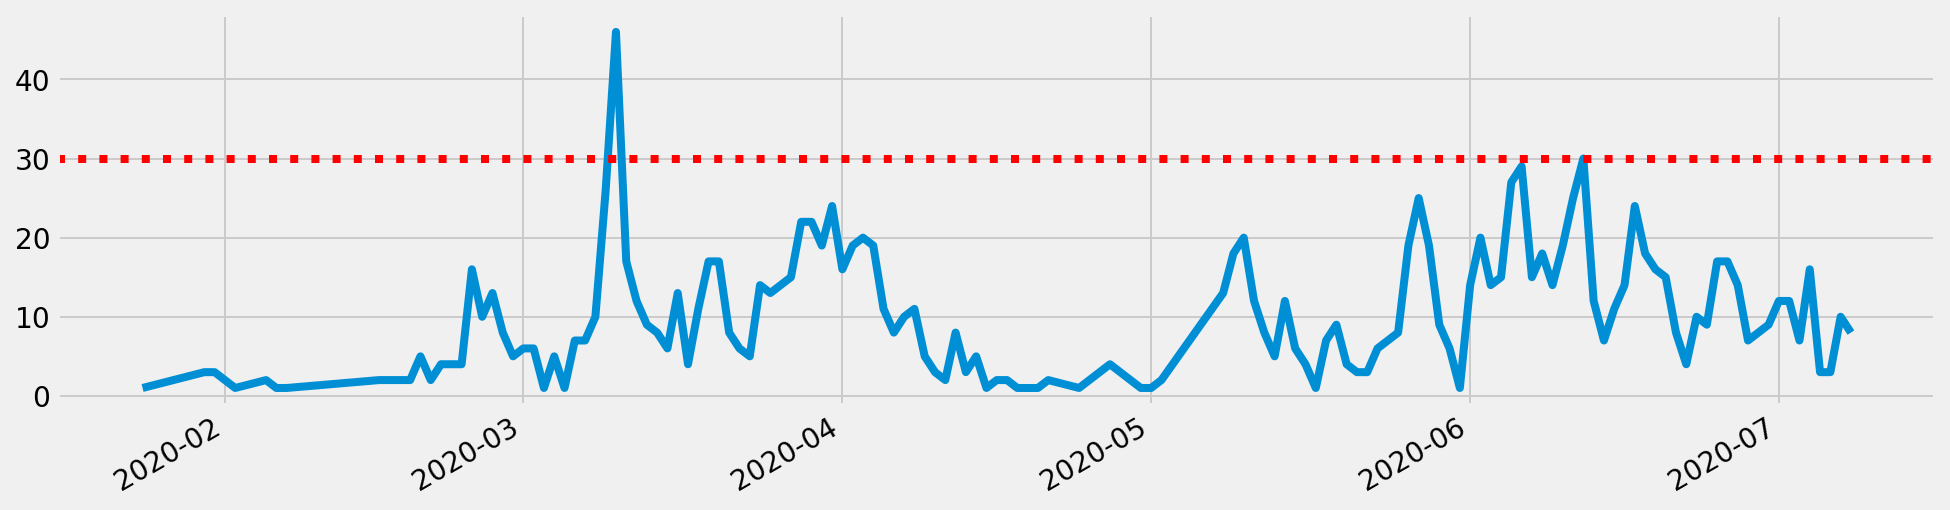

In [24]:
# 확진일자로 선 그래프를 그립니다.
df["확진일자"].value_counts().sort_index().plot(
    figsize = (15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")
plt.show()

## 선그래프에 값 표시가하기

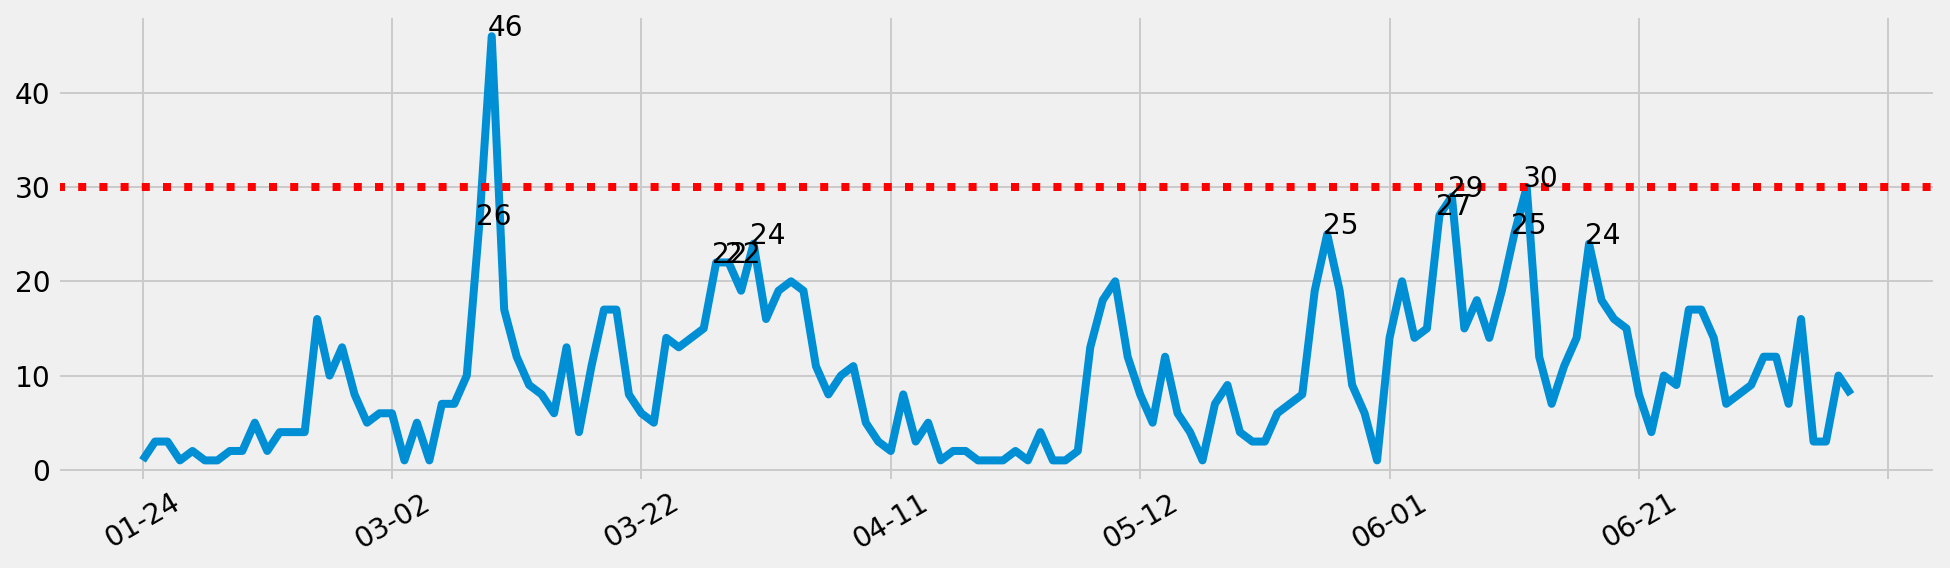

In [28]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
g = day_count.plot(figsize= (15, 4), rot=30)
plt.axhline(30, linestyle=":", color="red")
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 확진자가 가장 많이 나온 날

In [29]:
#describe 를 통해 일자별 확진자수를 요약할 수 있다
day_count.describe()

count    138.000000
mean      10.094203
std        7.755279
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

## 막대그래프 그리기

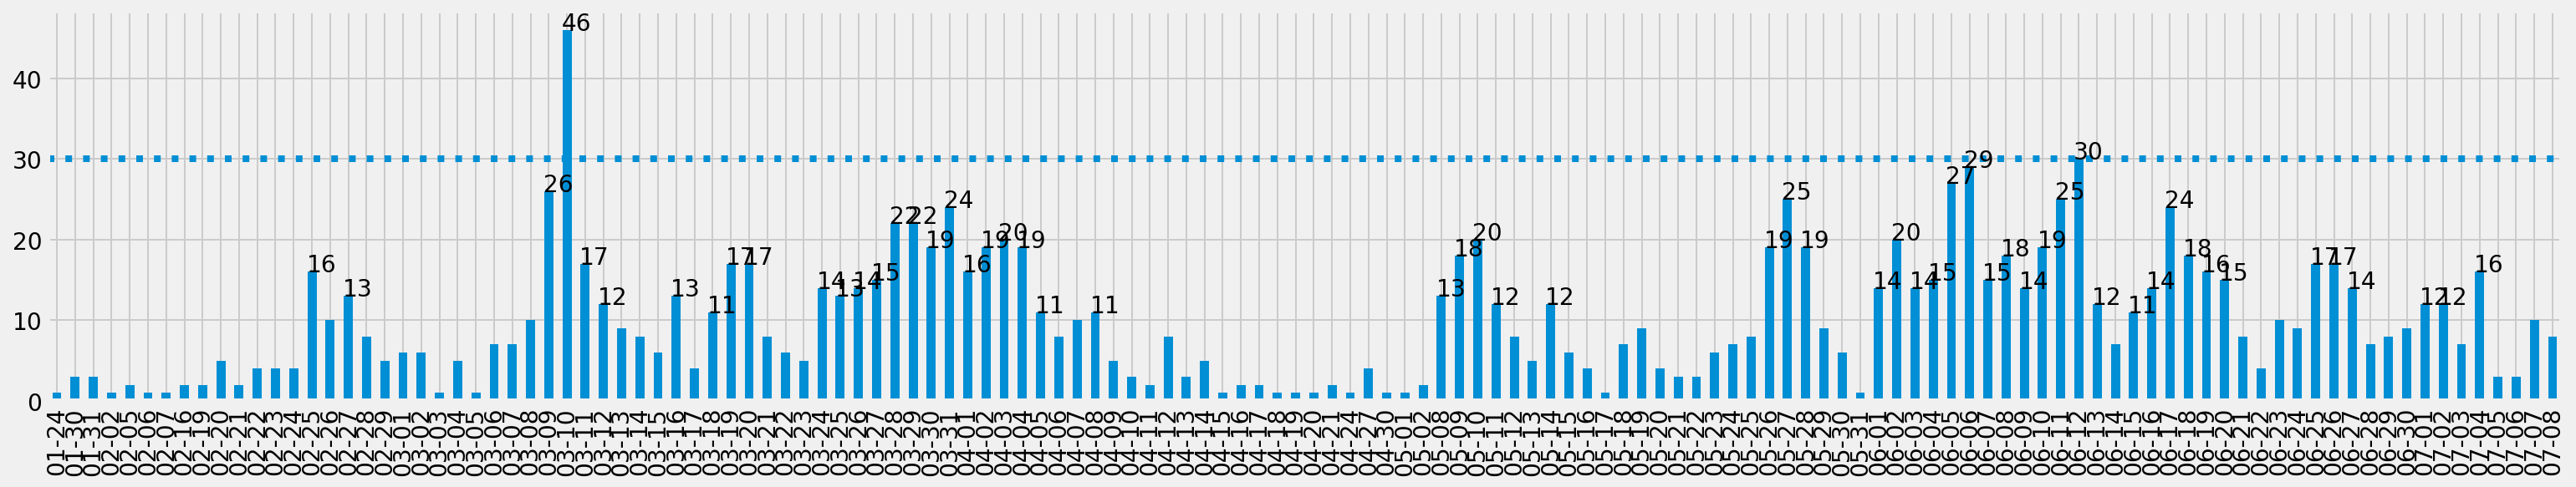

In [33]:
g = day_count.plot.bar(figsize=(24, 4))
g.axhline(30, linestyle=":")

for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 10:
        g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 최근 데이터만 그리기

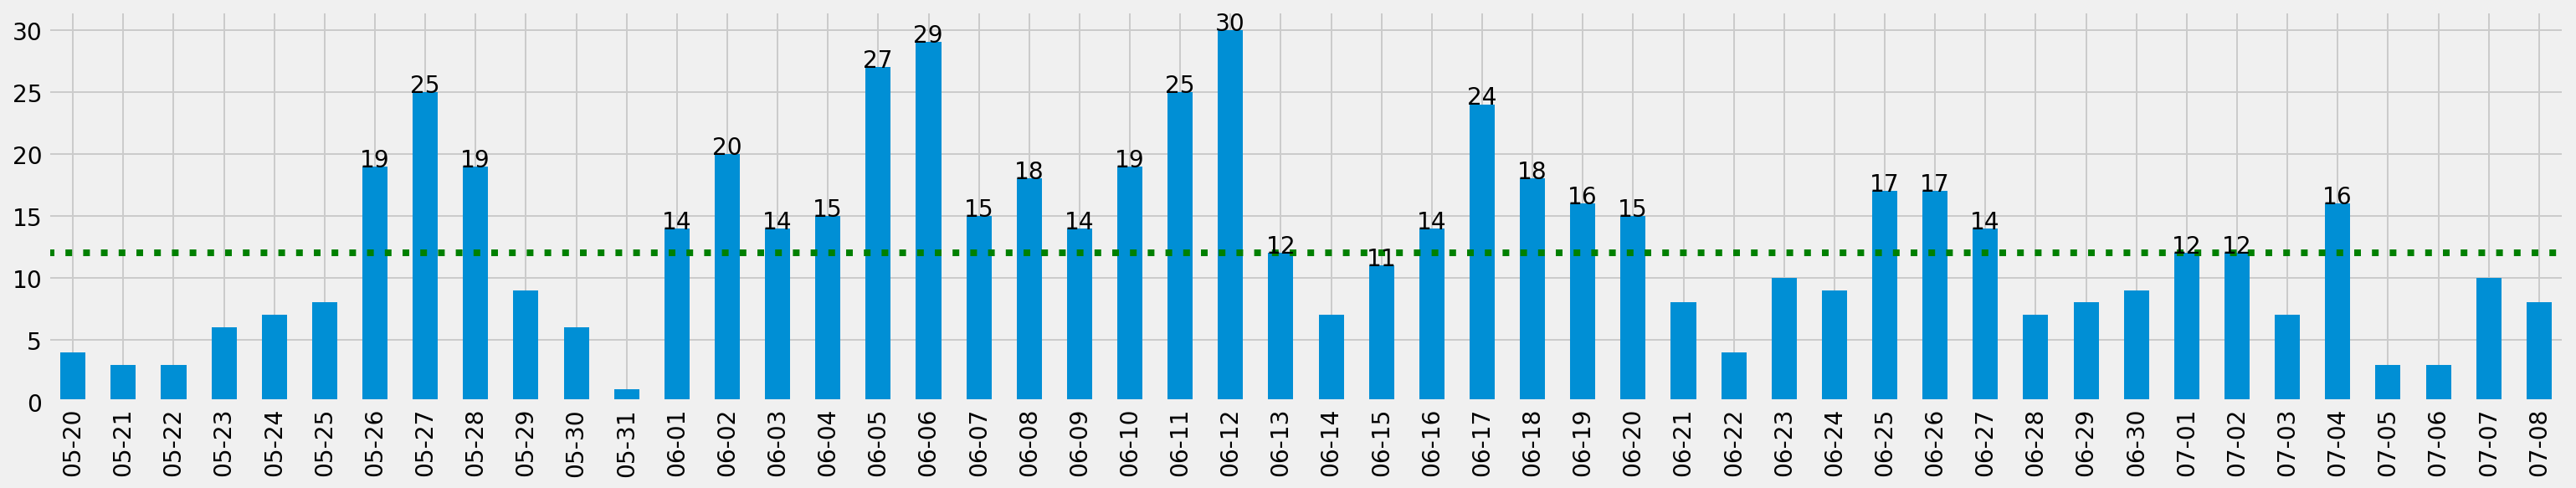

In [39]:
# 슬라이싱을 통해 최근 데이터만 그린다.
day_count_last = day_count[-50:]
g = day_count_last.plot.bar(figsize=(24, 4))
g.axhline(day_count_last.median(), linestyle=":", color="green")
for i in range(len(day_count_last)):
    case_count = day_count_last.iloc[i]
    if case_count > 10:
        g.text(x=i-0.3, y= day_count_last.iloc[i], s=day_count_last.iloc[i])

## 월별 확진자 수 그리기

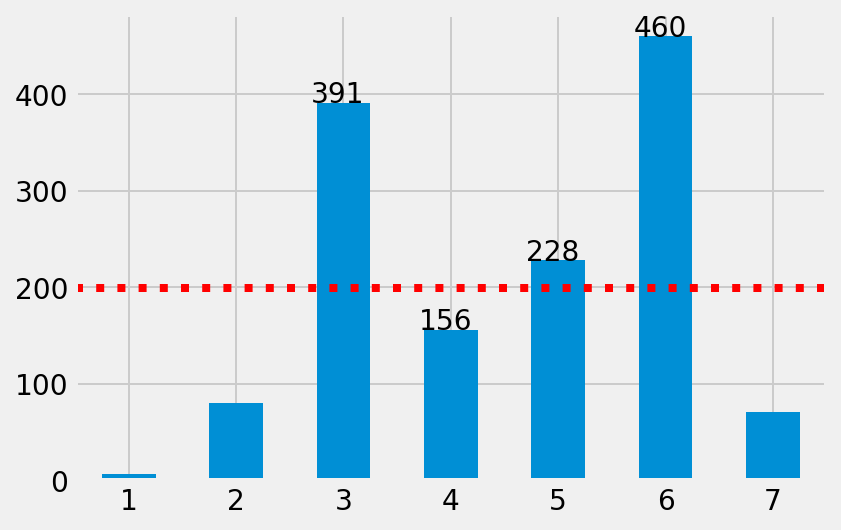

In [49]:
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)
g.axhline(month_case.mean(), linestyle=":", color="red")
for i in range(len(month_case)):
    month_case_i = month_case.iloc[i]
    if month_case_i > 100:
        g.text(x=i-0.3 ,y=month_case_i, s=month_case_i)

## 주단위 환자수 그리기

In [52]:
# 주별로 빈도 수를 나누기
week_case = df["주"].value_counts().sort_index()
week_case.head()

4     1
5     7
6     4
7     2
8    17
Name: 주, dtype: int64

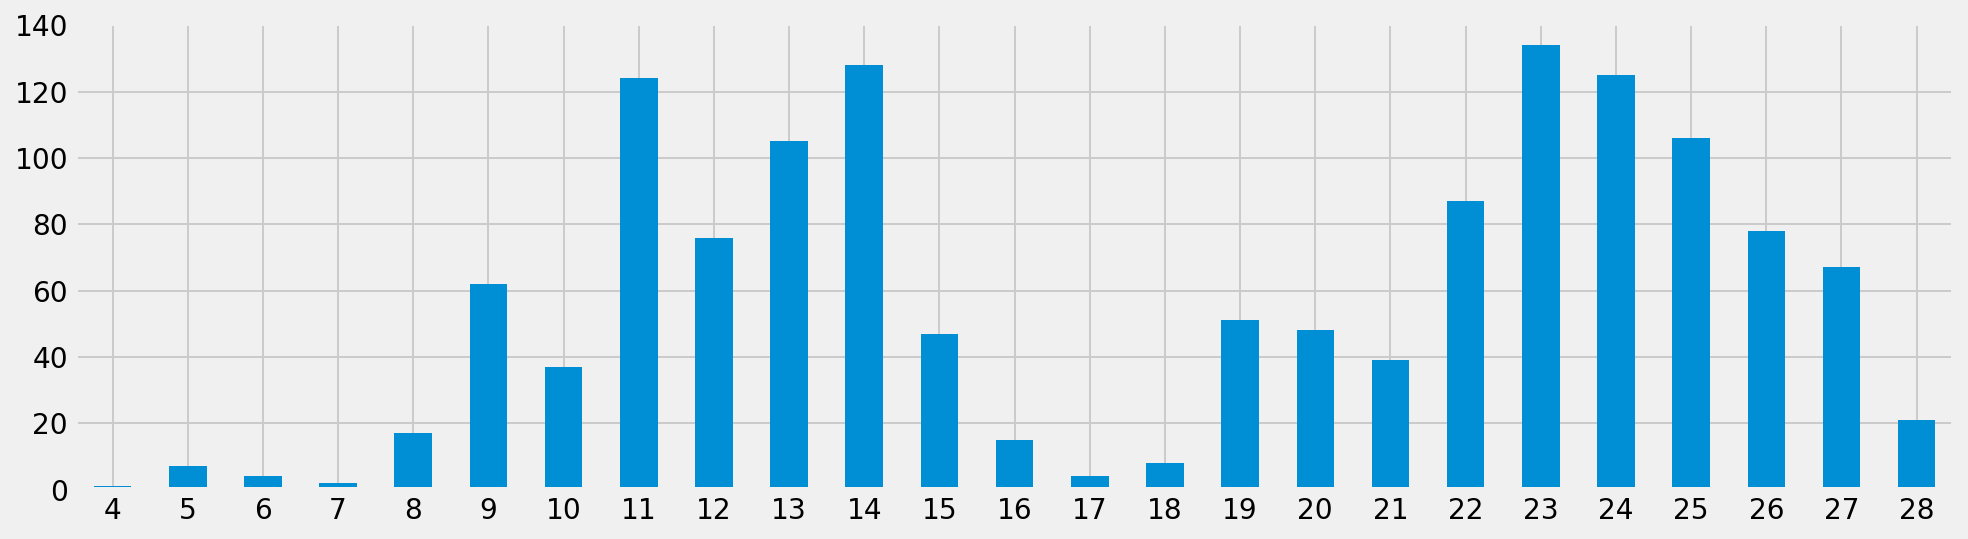

In [54]:
# 주단위 빈도수 막대그래프 그리기
week_case.plot.bar(rot=0, figsize=(15,4))
plt.show()

In [61]:
## groupby 를 통해  "월", "주" 로 그룹화 하여 빈도수 를 계산한다
month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     21
Name: 연번, dtype: int64

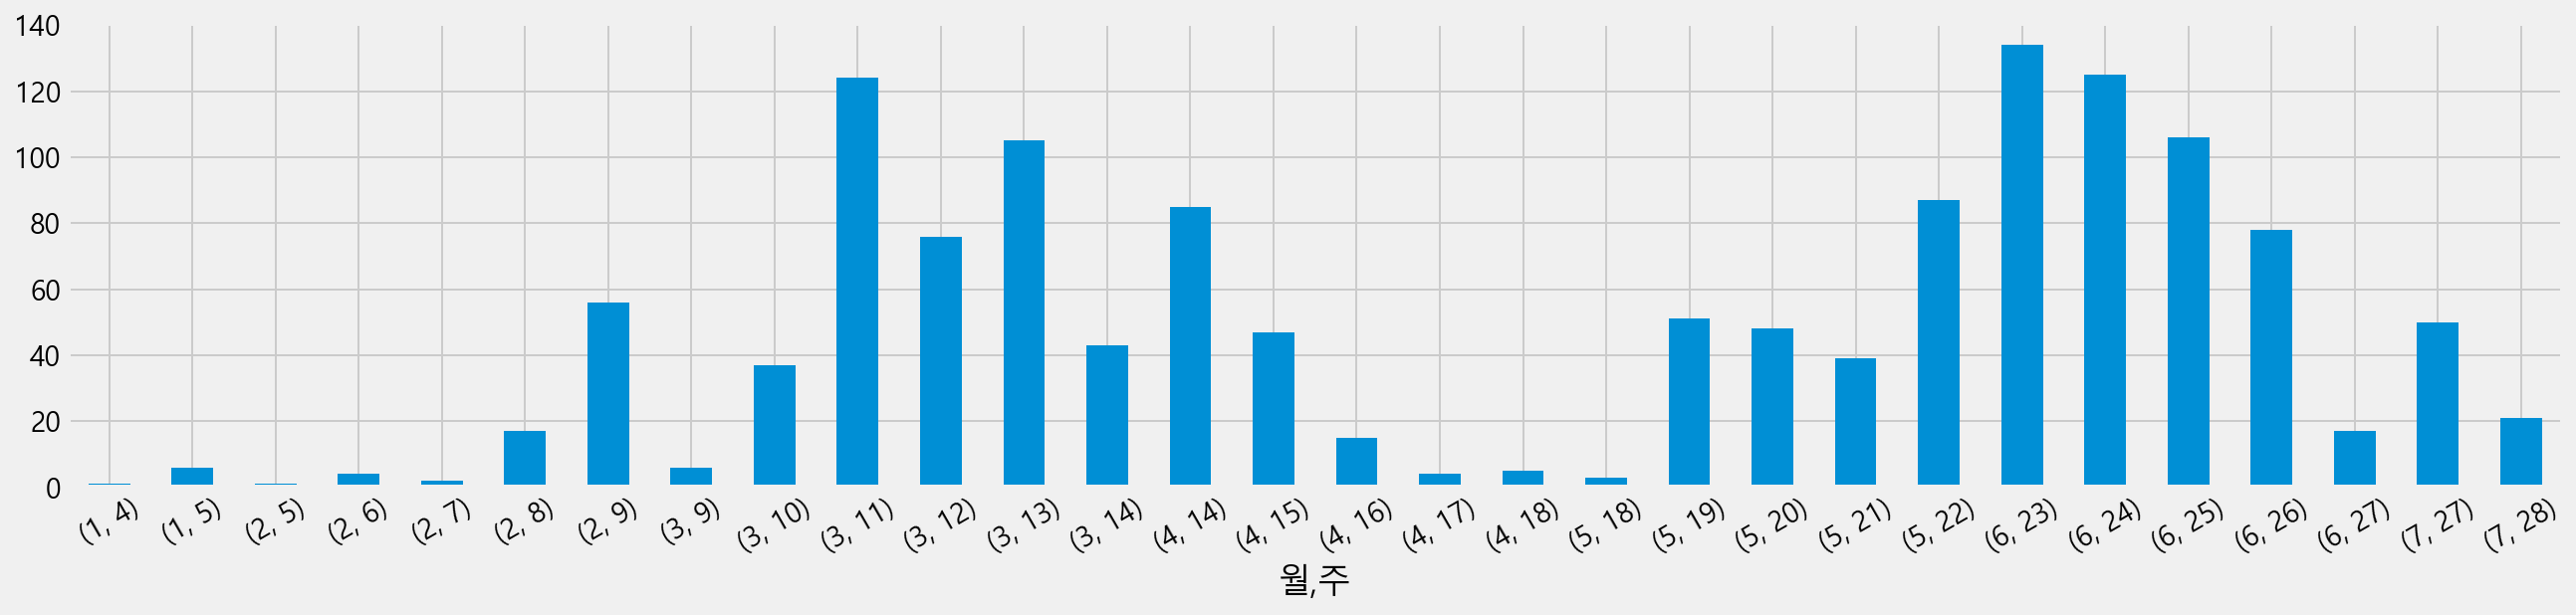

In [121]:
month_weekly_case.plot.bar(rot=30 ,figsize=(20,4))

# 모든 날짜를 행에 만들어 주기
- 확진자가 없는 날의 데이터도 만들어 준다

In [79]:
# 첫 확진일 부터 마지막 확진일까지 가져온다
# 데이터프레임의 첫번쨰 날짜는 first_day 에 마지막 날짜는 last_day

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[1]["확진일자"]
first_day , last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-07-08 00:00:00'))

In [90]:
days = pd.date_range(first_day, last_day)
days[:10]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02'],
              dtype='datetime64[ns]', freq='D')

In [91]:
days = pd.DataFrame({"확진일자":days})
days.head(3)

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26


In [104]:
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [105]:
daily_case = daily_case.to_frame()
daily_case.head(1)

,확진일자
2020-03-10,46


In [106]:
daily_case.columns = ["확진수"]
daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


## 4.1 merge 를 통해 전체 확진일자 만들기

In [108]:
all_day = days.merge(daily_case, left_on="확진일자", right_on=daily_case.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


# 누적 확진자 구하기

In [109]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
162,2020-07-04,16.0,1369.0
163,2020-07-05,3.0,1372.0
164,2020-07-06,3.0,1375.0
165,2020-07-07,10.0,1385.0


In [111]:
# 년도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head(3)

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26


In [113]:
cum_day = all_day.set_index("일자")
cum_day = cum_day[["확진수","누적확진"]]
cum_day.head(3)

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0


## 데이터프레임으로 그리기

In [118]:
plt.rcParams["font.family"] = 'NanumGothic'

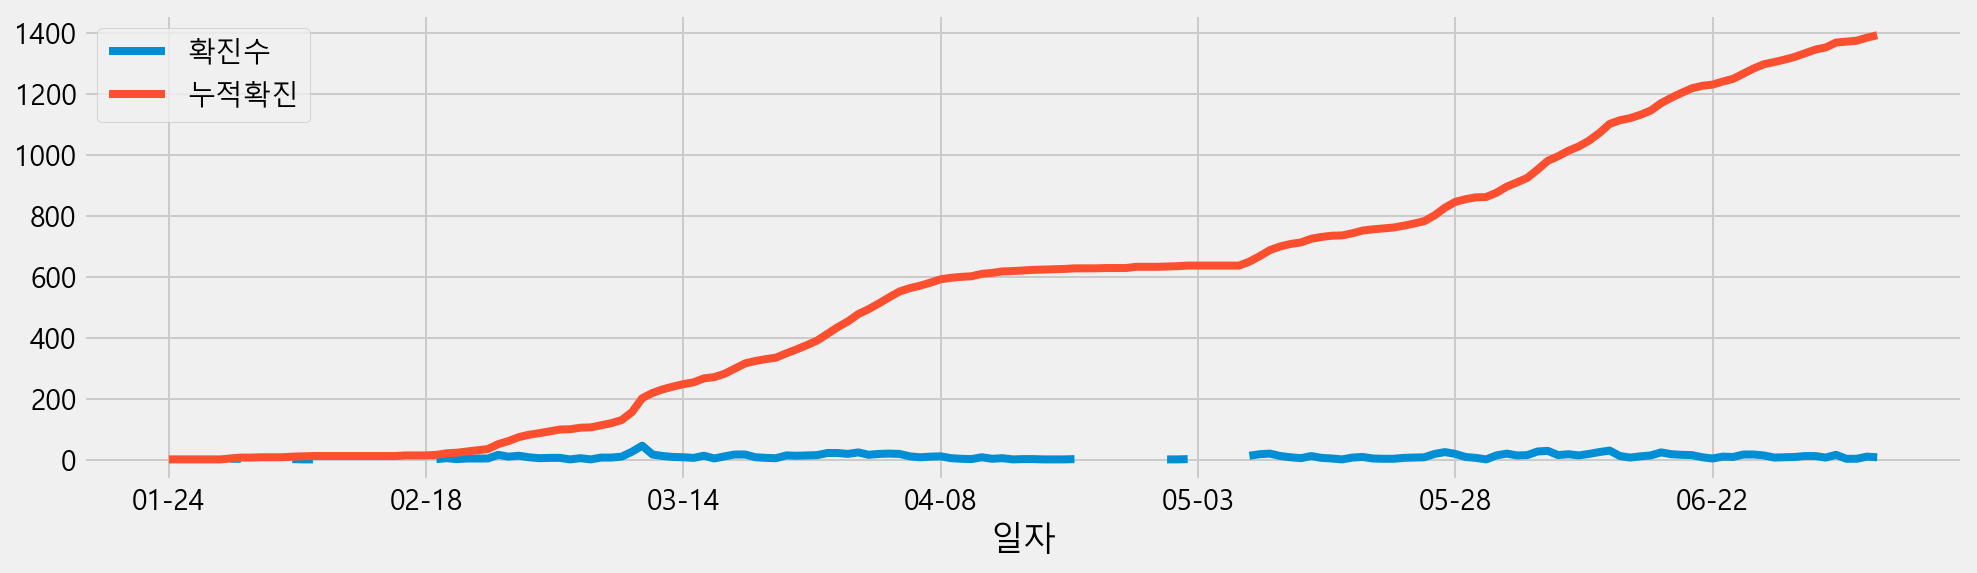

In [122]:
cum_day.plot(figsize=(15,4))

## 시리즈로 그리기

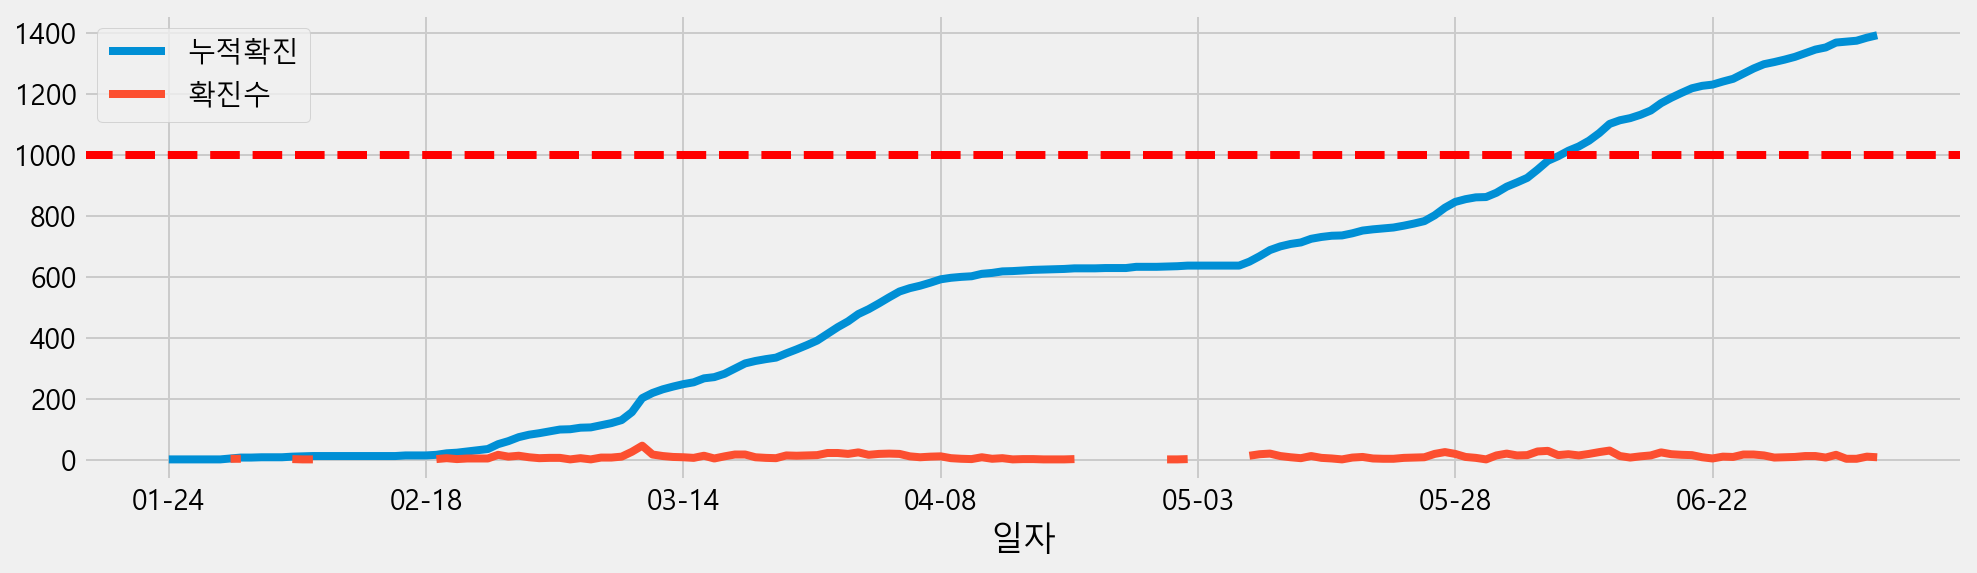

In [133]:
cum_day["누적확진"].plot(label="누적확진", figsize=(15,4))
cum_day["확진수"].plot(label="확진수", figsize=(15,4))
plt.legend()
plt.axhline(1000, linestyle="--", color="r")

## 확진자 수만 따로 그리기

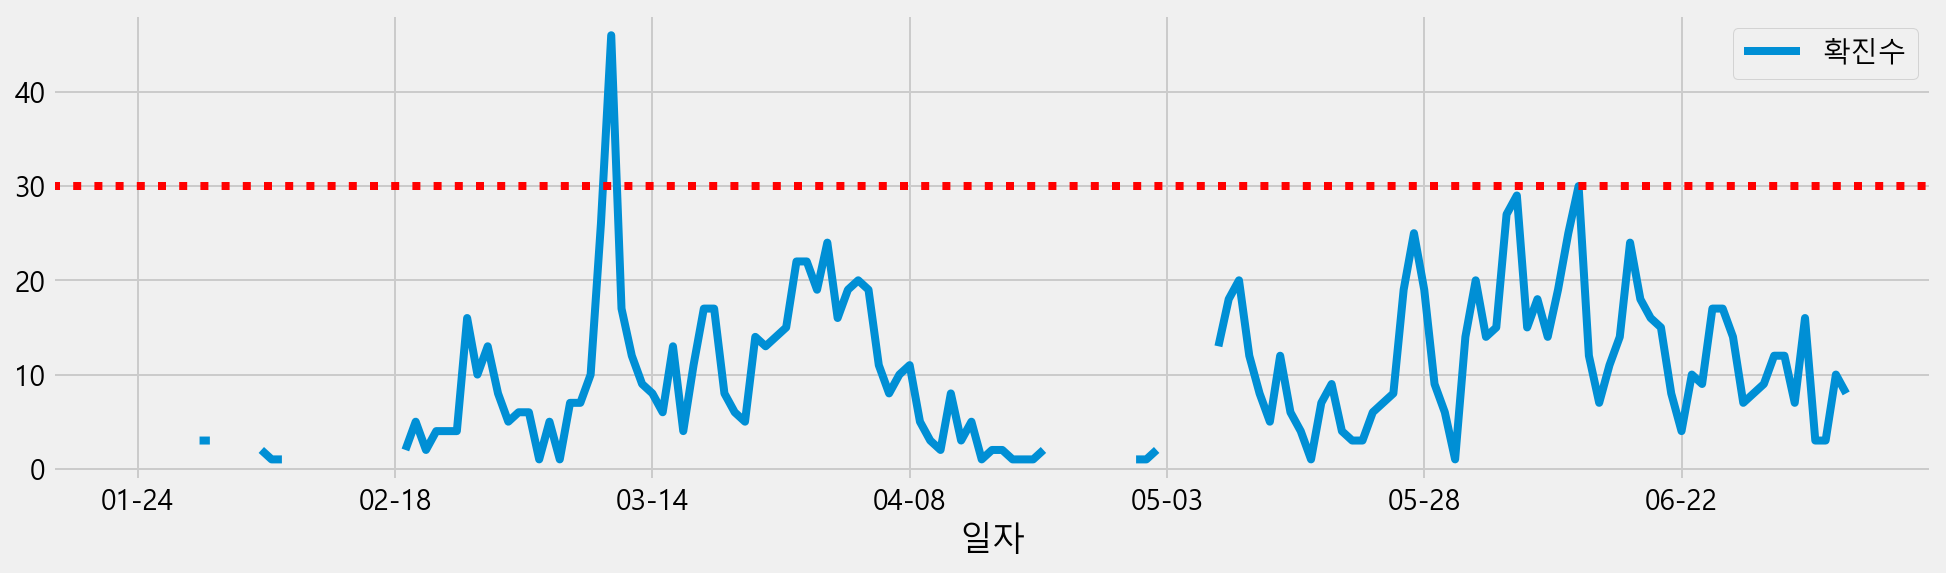

In [134]:
cum_day["확진수"].plot(label="확진수", figsize=(15,4))
plt.legend()
plt.axhline(30, linestyle=":", color="r")
plt.show()

## 누적 확진자 수만 따로 그리기

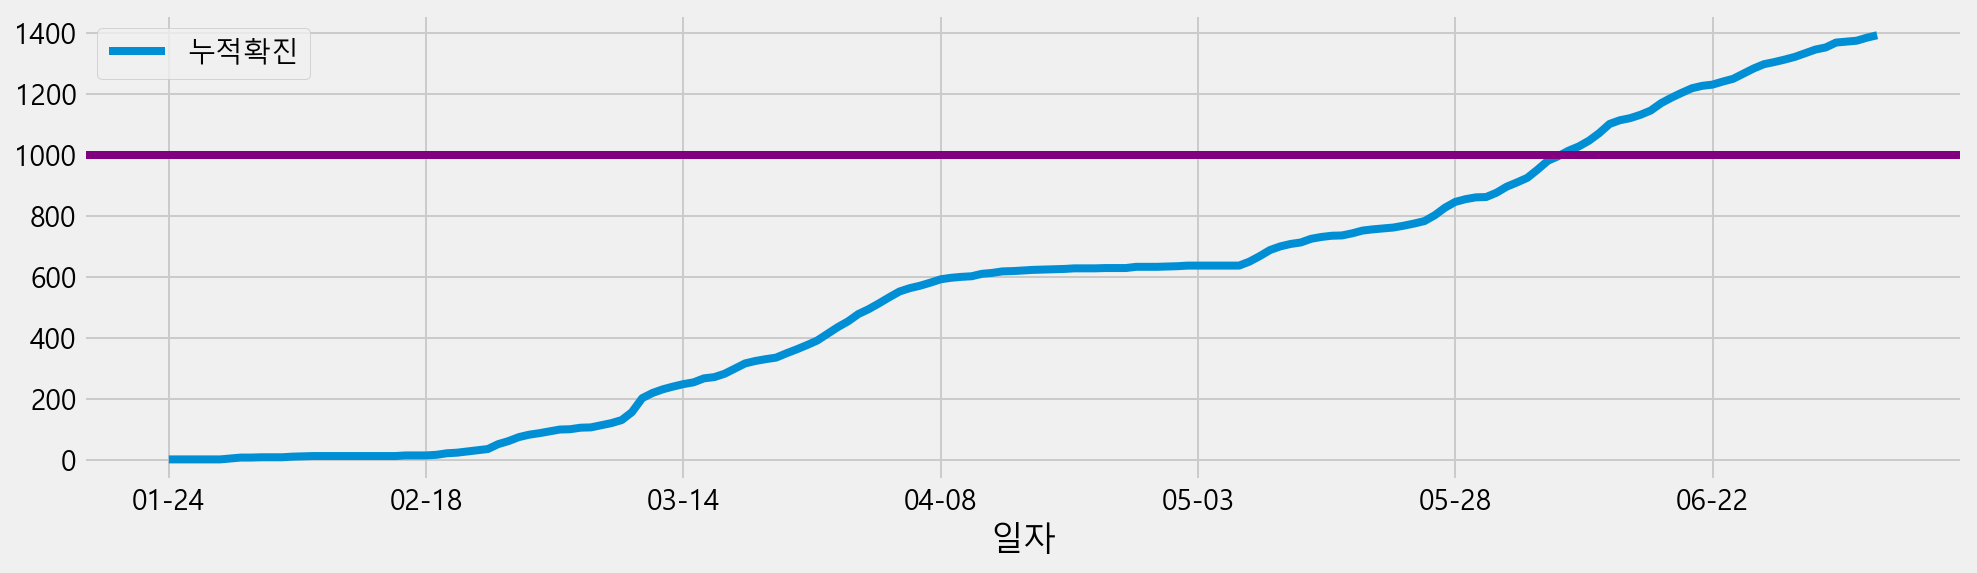

In [137]:
cum_day["누적확진"].plot(label="누적확진", figsize=(15,4))
plt.legend()
plt.axhline(1000, linestyle="-", color="purple")
plt.show()

## 로그스케일
- 차이가 너무 커서 그래프가 자세히 보이지 않을 떄 로그스케일로 표현하면 차리가 큰 값으 스케일을 조정해준다.

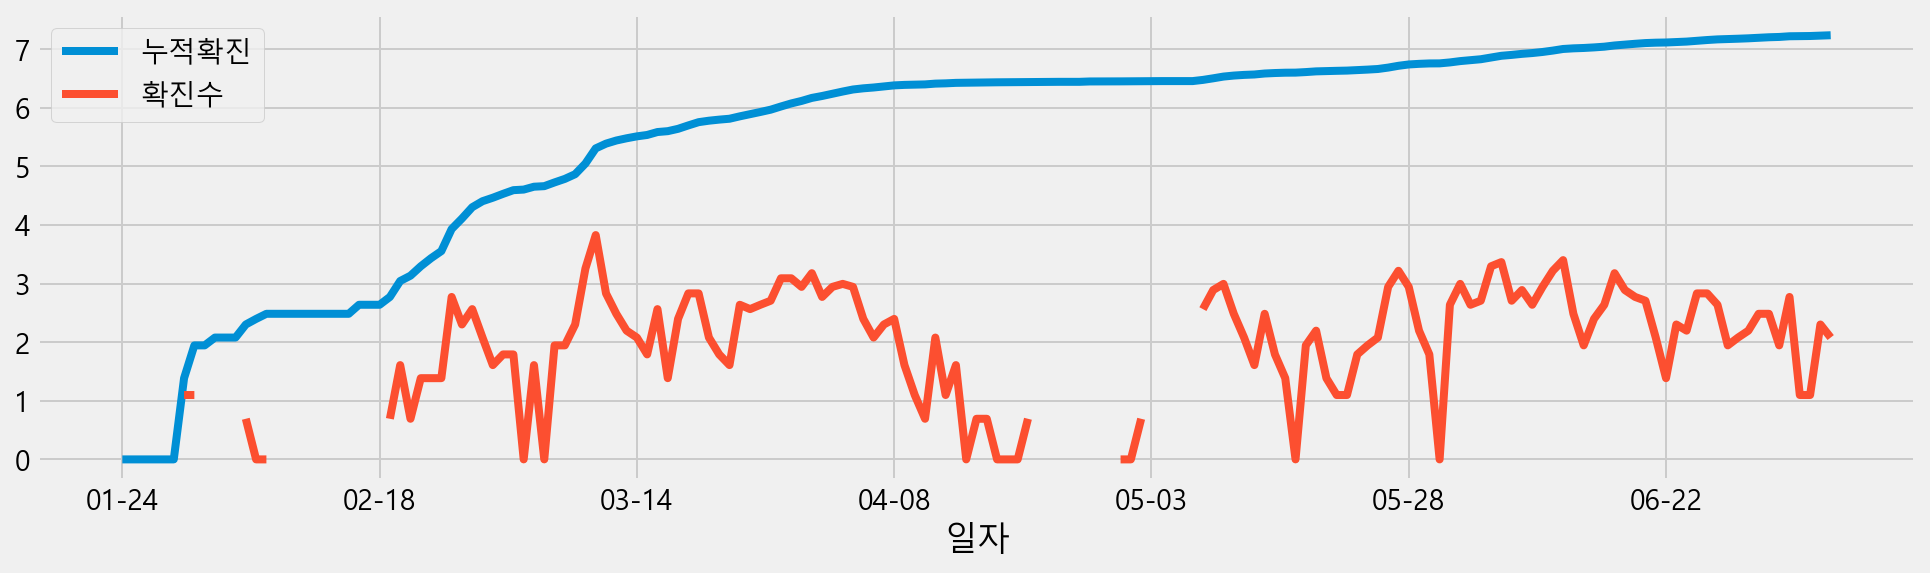

In [142]:
import numpy as np
np.log(cum_day["누적확진"]).plot(label="누적확진",figsize= (15,4))
np.log(cum_day["확진수"]).plot(label="확진수",figsize= (15,4))
plt.legend()
plt.show()


## 확진월과 요일 구하기

In [143]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


# 요일별 확진 수

In [144]:
# 월별, 요일별 확진수 구하기
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum().unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,3,10,20,12,7,16,3


In [145]:
all_day_week.columns = ["월", "화", "수", "목", "금", "토", "일"]
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,3,10,20,12,7,16,3


In [146]:
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,3,10,20,12,7,16,3


# 거주지별 확진자

In [147]:
gu_count = df["거주지"].value_counts()
gu_count.head(3)

관악구    131
구로구     88
강남구     85
Name: 거주지, dtype: int64

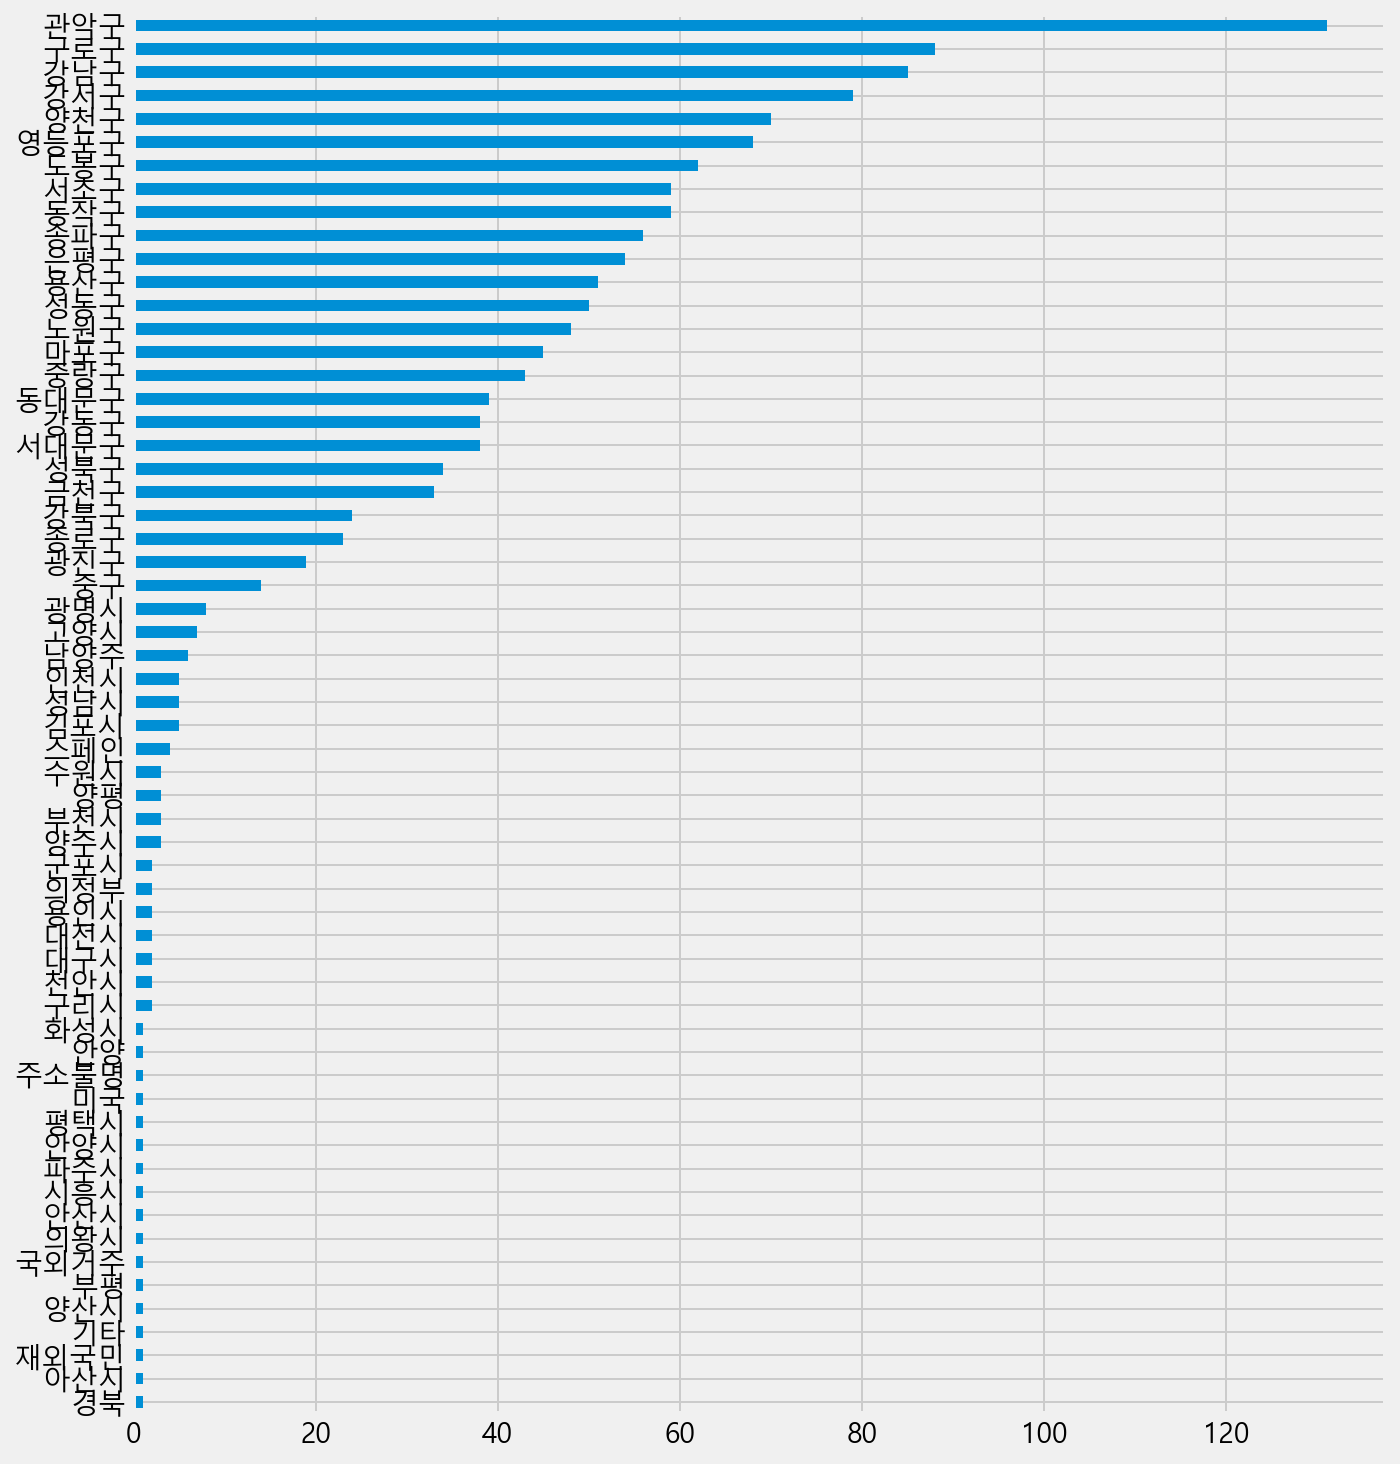

In [149]:
gu_count.sort_values().plot.barh(figsize=(10, 12), grid=True)

In [225]:
gu = pd.DataFrame(gu_count)
gu.reset_index(inplace=True)
gu.columns = ["거주지", "수"]
df_gu = gu.loc[gu["거주지"].str[-1:]== '구']
df_gu.columns = ["구", "환자수"]
gu = df_gu["구"]

In [227]:
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
df.loc[~df["거주지"].isin(gu), "지역"] = "타지역"
df[["거주지", "지역"]].head()

,거주지,지역
0,광진구,광진구
1,동작구,동작구
2,구로구,구로구
3,노원구,노원구
4,중구,중구


In [235]:
df["지역"] = df["거주지"].map(lambda x : x if x in gu else x, "없음")
df[["거주지", "지역"]].head()

,거주지,지역
0,광진구,광진구
1,동작구,동작구
2,구로구,구로구
3,노원구,노원구
4,중구,중구


In [236]:
df["지역"].value_counts()

관악구     131
구로구      88
강남구      85
강서구      79
양천구      70
영등포구     68
도봉구      62
서초구      59
동작구      59
송파구      56
은평구      54
용산구      51
성동구      50
노원구      48
마포구      45
중랑구      43
동대문구     39
강동구      38
서대문구     38
성북구      34
금천구      33
강북구      24
종로구      23
광진구      19
중구       14
광명시       8
고양시       7
남양주       6
인천시       5
성남시       5
김포시       5
스페인       4
수원시       3
양평        3
부천시       3
양주시       3
의정부       2
용인시       2
대전시       2
군포시       2
대구시       2
천안시       2
구리시       2
아산시       1
안산시       1
재외국민      1
기타        1
양산시       1
부평        1
국외거주      1
의왕시       1
파주시       1
시흥시       1
안양        1
주소불명      1
화성시       1
평택시       1
안양시       1
미국        1
경북        1
Name: 지역, dtype: int64